In [17]:
!pip install kaggle

In [18]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [19]:
#API to fetch the dataset from kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset --force


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:00<00:00, 826MB/s] 
100% 163M/163M [00:00<00:00, 548MB/s]


In [20]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [21]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [23]:
with_mask_files =os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2106.jpg', 'with_mask_3290.jpg', 'with_mask_84.jpg', 'with_mask_1348.jpg', 'with_mask_3597.jpg']
['with_mask_2128.jpg', 'with_mask_2587.jpg', 'with_mask_3247.jpg', 'with_mask_284.jpg', 'with_mask_1726.jpg']


In [24]:
without_mask_files =os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3044.jpg', 'without_mask_1531.jpg', 'without_mask_1496.jpg', 'without_mask_2072.jpg', 'without_mask_261.jpg']
['without_mask_1639.jpg', 'without_mask_1020.jpg', 'without_mask_39.jpg', 'without_mask_843.jpg', 'without_mask_1755.jpg']


In [25]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creting labels for the two claass of images**

with mask --> 1
without mask --> 0

In [26]:
#create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [27]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [28]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [29]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

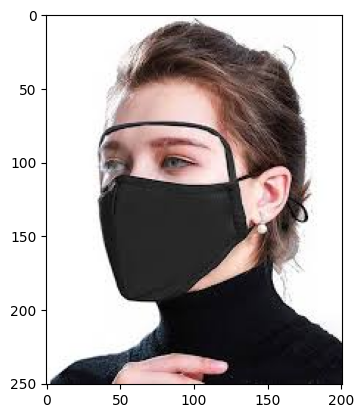

In [30]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2106.jpg')
imgplot =plt.imshow(img)
plt.show()

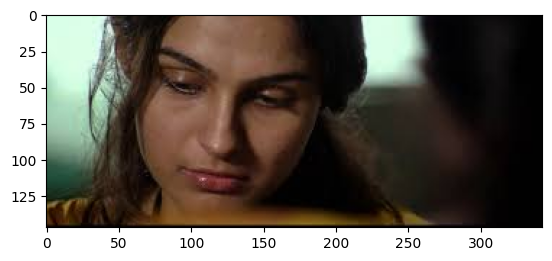

In [31]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3044.jpg')
imgplot =plt.imshow(img)
plt.show()

Image processing

1. Resize the images to numpy arrays
2. convert the images to numpy arrays

In [33]:
#convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [34]:
type(data)

list

In [35]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 253, 254],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [ 21,  20,  26],
        [ 21,  20,  26],
        [ 21,  20,  26]],

       [[251, 252, 254],
        [246, 247, 248],
        [151, 155, 160],
        ...,
        [ 22,  21,  27],
        [ 23,  22,  28],
        [ 23,  22,  28]],

       [[254, 255, 255],
        [225, 227, 232],
        [ 39,  44,  53],
        ...,
        [ 22,  21,  27],
        [ 23,  22,  28],
        [ 21,  20,  26]]], dtype=uint8)
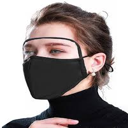

In [36]:
data[0]

In [37]:
type(data[0])

numpy.ndarray

In [38]:
data[0].shape

(128, 128, 3)

In [39]:
# converting image list to numpy array
x=np.array(data)
y=np.array(labels)

In [40]:
type(y)

numpy.ndarray

In [41]:
type(x)

numpy.ndarray

In [43]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [44]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [46]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [47]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled=x_test/255

array([[[ 72,  76, 105],
        [ 66,  70,  99],
        [ 64,  69,  99],
        ...,
        [ 63,  69,  91],
        [ 65,  71,  93],
        [ 62,  70,  89]],

       [[ 65,  69,  97],
        [ 62,  66,  94],
        [ 62,  67,  96],
        ...,
        [ 68,  75,  95],
        [ 64,  70,  90],
        [ 63,  69,  88]],

       [[ 62,  66,  93],
        [ 63,  67,  94],
        [ 61,  67,  93],
        ...,
        [ 63,  70,  89],
        [ 65,  70,  90],
        [ 61,  67,  84]],

       ...,

       [[172, 176, 201],
        [170, 174, 199],
        [170, 176, 198],
        ...,
        [ 93,  82,  80],
        [ 49,  39,  37],
        [ 39,  29,  27]],

       [[173, 177, 203],
        [171, 175, 200],
        [170, 176, 199],
        ...,
        [ 97,  87,  85],
        [ 54,  43,  41],
        [ 40,  30,  28]],

       [[171, 175, 202],
        [173, 177, 202],
        [172, 178, 202],
        ...,
        [ 99,  89,  87],
        [ 54,  43,  41],
        [ 38,  28,  26]]], dtype=uint8)
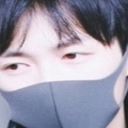

In [48]:
x_train[0]

In [49]:
x_train_scaled[0]

array([[[0.28235294, 0.29803922, 0.41176471],
        [0.25882353, 0.2745098 , 0.38823529],
        [0.25098039, 0.27058824, 0.38823529],
        ...,
        [0.24705882, 0.27058824, 0.35686275],
        [0.25490196, 0.27843137, 0.36470588],
        [0.24313725, 0.2745098 , 0.34901961]],

       [[0.25490196, 0.27058824, 0.38039216],
        [0.24313725, 0.25882353, 0.36862745],
        [0.24313725, 0.2627451 , 0.37647059],
        ...,
        [0.26666667, 0.29411765, 0.37254902],
        [0.25098039, 0.2745098 , 0.35294118],
        [0.24705882, 0.27058824, 0.34509804]],

       [[0.24313725, 0.25882353, 0.36470588],
        [0.24705882, 0.2627451 , 0.36862745],
        [0.23921569, 0.2627451 , 0.36470588],
        ...,
        [0.24705882, 0.2745098 , 0.34901961],
        [0.25490196, 0.2745098 , 0.35294118],
        [0.23921569, 0.2627451 , 0.32941176]],

       ...,

       [[0.6745098 , 0.69019608, 0.78823529],
        [0.66666667, 0.68235294, 0.78039216],
        [0.66666667, 0

**Builing a Convolutional Neural Network(CNN)**

In [51]:
import tensorflow as tf
from tensorflow import keras

In [53]:
num_of_classes = 2
model =keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [55]:
#training the neural network
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - acc: 0.6698 - loss: 0.7554 - val_acc: 0.8612 - val_loss: 0.3211
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8704 - loss: 0.3118 - val_acc: 0.8876 - val_loss: 0.2580
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9025 - loss: 0.2433 - val_acc: 0.8777 - val_loss: 0.2874
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9070 - loss: 0.2340 - val_acc: 0.9157 - val_loss: 0.2305
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9221 - loss: 0.1855 - val_acc: 0.8975 - val_loss: 0.2807


**Model Evaluation **

In [56]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9259 - loss: 0.1955
Test Accuracy = 0.9172733426094055


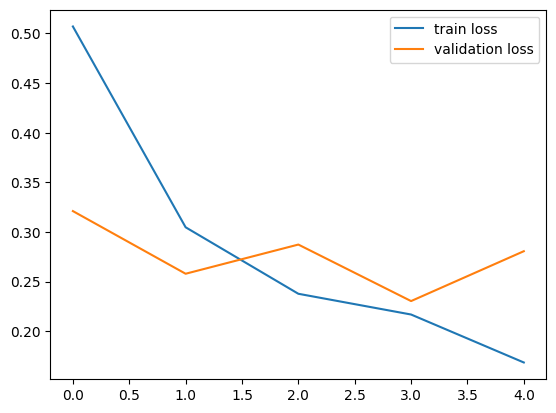

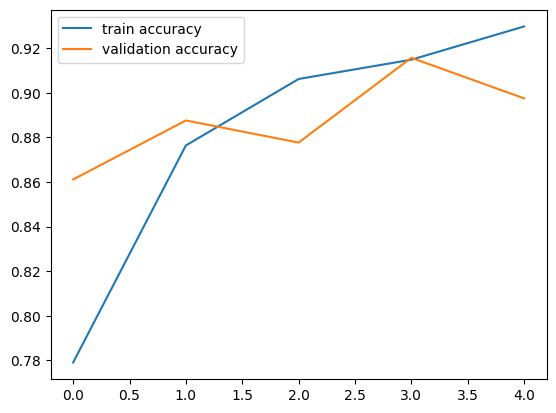

In [57]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Enter the path of the image to be tested: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label==1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')
